# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Krismantoro Bagus Meidianto
- **Email:** kbagusm05@gmail.com
- **ID Dicoding:** kbagusm

## Menentukan Pertanyaan Bisnis

- Bagaimana temperature, humidity, dan kondisi cuaca memengaruhi permintaan rental sepeda pada musim yang berbeda?
- Apa jam sibuk/peak hours dan hari sibuk untuk rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [133]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [134]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Membaca 2 file csv dari dataset yang diberikan. Diberi nama hour_df untuk hour.csv dan day_df untuk day.csv
- Menampilkan records untuk 5 rows pertama dengan menggunakan <`namavariabel`>.head()
- day_df tidak memiliki kolom hr yang hanya terdapat pada hour_df, selebihnya memiliki fields/kolom yang sama

### Assessing Data

#### Menilai tabel `hour_df`

In [135]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terlihat tipe data `dteday` merupakan object (string), seharusnya menggunakan tipedata datetime

In [136]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [137]:
print('jumlah duplikasi: ', hour_df.duplicated().sum())
hour_df.describe()

jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Menilai tabel `day_df`

In [138]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat tipe data `dteday` merupakan object (string), sama seperti tabel `hour_df`, seharusnya menggunakan tipedata datetime

In [139]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [140]:
print('jumlah duplikasi: ', day_df.duplicated().sum())
day_df.describe()

jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada tahap ini diketahui bahwa kedua tipe data untuk `dteday` merupakan object (string) sehingga harus dilakukan perubahan tipe data menjadi datetime pada tahap cleaning data
- masing-masing tabel hour_df dan day_df tidak memeiliki null values, duplikasi, dan inaccurate values

### Cleaning Data

Karena hanya terdapat masalah pada kolom `dteday` maka saya jadikan satu saja pengerjaan

#### Membersihkan tabel `hour_df` dan `day_df`

Mengubah tipe data `dteday` menjadi datetime

In [141]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [142]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [143]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data `dteday` sudah benar menjadi datetime
- Tidak ada lagi yang perlu dilakukan proses cleaning data karena data sudah bersih

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [144]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9978,9979,2012-02-25,1,1,2,19,0,6,0,1,0.26,0.2121,0.33,0.4478,12,137,149
13579,13580,2012-07-25,3,1,7,0,0,3,1,1,0.72,0.6667,0.58,0.2985,9,57,66
12702,12703,2012-06-18,2,1,6,11,0,1,1,2,0.54,0.5152,0.88,0.1642,25,96,121
3599,3600,2011-06-03,2,0,6,21,0,5,1,1,0.64,0.6212,0.29,0.1045,51,196,247
15442,15443,2012-10-10,4,1,10,15,0,3,1,1,0.60,0.6212,0.40,0.1642,58,261,319


In [145]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


nb: season (1:springer, 2:summer, 3:fall, 4:winter)

In [146]:
hour_df.groupby('season').agg({
    'yr': ['max', 'min', 'mean'],
    'mnth': ['max', 'min', 'mean'],
    'hr': ['max', 'min','mean']
})

yr               mnth                 hr               
       max min      mean  max min       mean max min       mean
season                                                         
1        1   0  0.512494   12   1   3.119755  23   0  11.648515
2        1   0  0.500340    6   3   4.654117  23   0  11.512134
3        1   0  0.501779    9   6   7.689724  23   0  11.507562
4        1   0  0.495747   12   9  10.702505  23   0  11.522448

Rata-rata untuk season 1 dan 2 rental sepeda pada bulan awal sedangkan season 3 dan 4 untuk bulan pertengahan dan akhir

In [147]:
hour_df.groupby('season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean'],
    'weathersit': ['mean'],
    'cnt': ['mean']
})

temp                   atemp                    hum                  \
         max   min      mean     max     min      mean  max   min      mean   
season                                                                        
1       0.72  0.02  0.299147  0.6515  0.0000  0.298116  1.0  0.00  0.581348   
2       0.94  0.16  0.544663  0.8788  0.1667  0.520547  1.0  0.16  0.627022   
3       1.00  0.38  0.706410  1.0000  0.2424  0.656004  1.0  0.16  0.633167   
4       0.76  0.14  0.423138  0.6818  0.1515  0.415738  1.0  0.16  0.667124   

       weathersit         cnt  
             mean        mean  
season                         
1        1.460160  111.114569  
2        1.443638  208.344069  
3        1.330294  236.016237  
4        1.472117  198.868856

Max, min, mean dari temperature, feeling temperature, humidity, weathersit, dan jumlah rental untuk tiap season <br>
nb: <br>
weathersit: <br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>

In [148]:
hour_df.groupby('yr')['cnt'].sum().sort_values()

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

Jumlah rental sepeda terbanyak terjadi pada tahun 1 (2012)

### Explore `day_df`

In [149]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
474,475,2012-04-19,2,1,4,0,4,1,1,0.498333,0.493046,0.612500,0.065929,846,5719,6565
14,15,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.498750,0.157963,222,1026,1248
530,531,2012-06-14,2,1,6,0,4,1,1,0.648333,0.624383,0.569583,0.253733,1180,6183,7363
18,19,2011-01-19,1,0,1,0,3,1,2,0.292174,0.298422,0.741739,0.208317,78,1572,1650
168,169,2011-06-18,2,0,6,0,6,0,1,0.696667,0.643954,0.670417,0.119408,1807,3312,5119


In [150]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [151]:
day_df.groupby('season').agg({
    'yr': ['max', 'min', 'mean'],
    'mnth': ['max', 'min', 'mean']
})

yr               mnth               
       max min      mean  max min       mean
season                                      
1        1   0  0.502762   12   1   3.093923
2        1   0  0.500000    6   3   4.652174
3        1   0  0.500000    9   6   7.691489
4        1   0  0.500000   12   9  10.696629

Sama seperti hour_df, rata-rata bulan rental sepeda untuk season 1 dan 2 pada awal bulan sedangkan season 3 dan 4 pertengahan dan akhir bulan

In [152]:
day_df.groupby('season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean'],
    'weathersit': ['mean'],
    'cnt': ['mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
1       0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
2       0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
3       0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
4       0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                           weathersit          cnt  
             min      mean       mean         mean  
season                                              
1       0.000000  0.582903   1.408840  2604.132597  
2       0.254167  0.626948   1.402174  4992.331522  
3       0.360000  0.633482   1.297872  5644.303191  
4       0.333478  0.668719   1.477528  4728.162921

Max, min, mean dari temperature, feeling temperature, humidity, weathersit, dan jumlah rental untuk tiap season

In [153]:
day_df.groupby('season')['cnt'].sum().sort_values()

season
1     471348
4     841613
2     918589
3    1061129
Name: cnt, dtype: int64

Jumlah rental sepeda terbanyak terjadi pada season ke 3 (fall) dan paling sedikit pada season ke 1 (springer)

**Insight:**
- Mengetahui perbandingan max, min, mean dari kolom season terhadap year, month, temperature, humidity
- Mengetahui jumlah rental sepeda untuk tahun tertentu dan season tertentu
- Kebanyakan pemesan rental sepeda melakukan pada saat cuaca clear (weathersit=1)

## Visualization & Explanatory Analysis

### Correlation Heatmap `hour_df` dan `day_df`

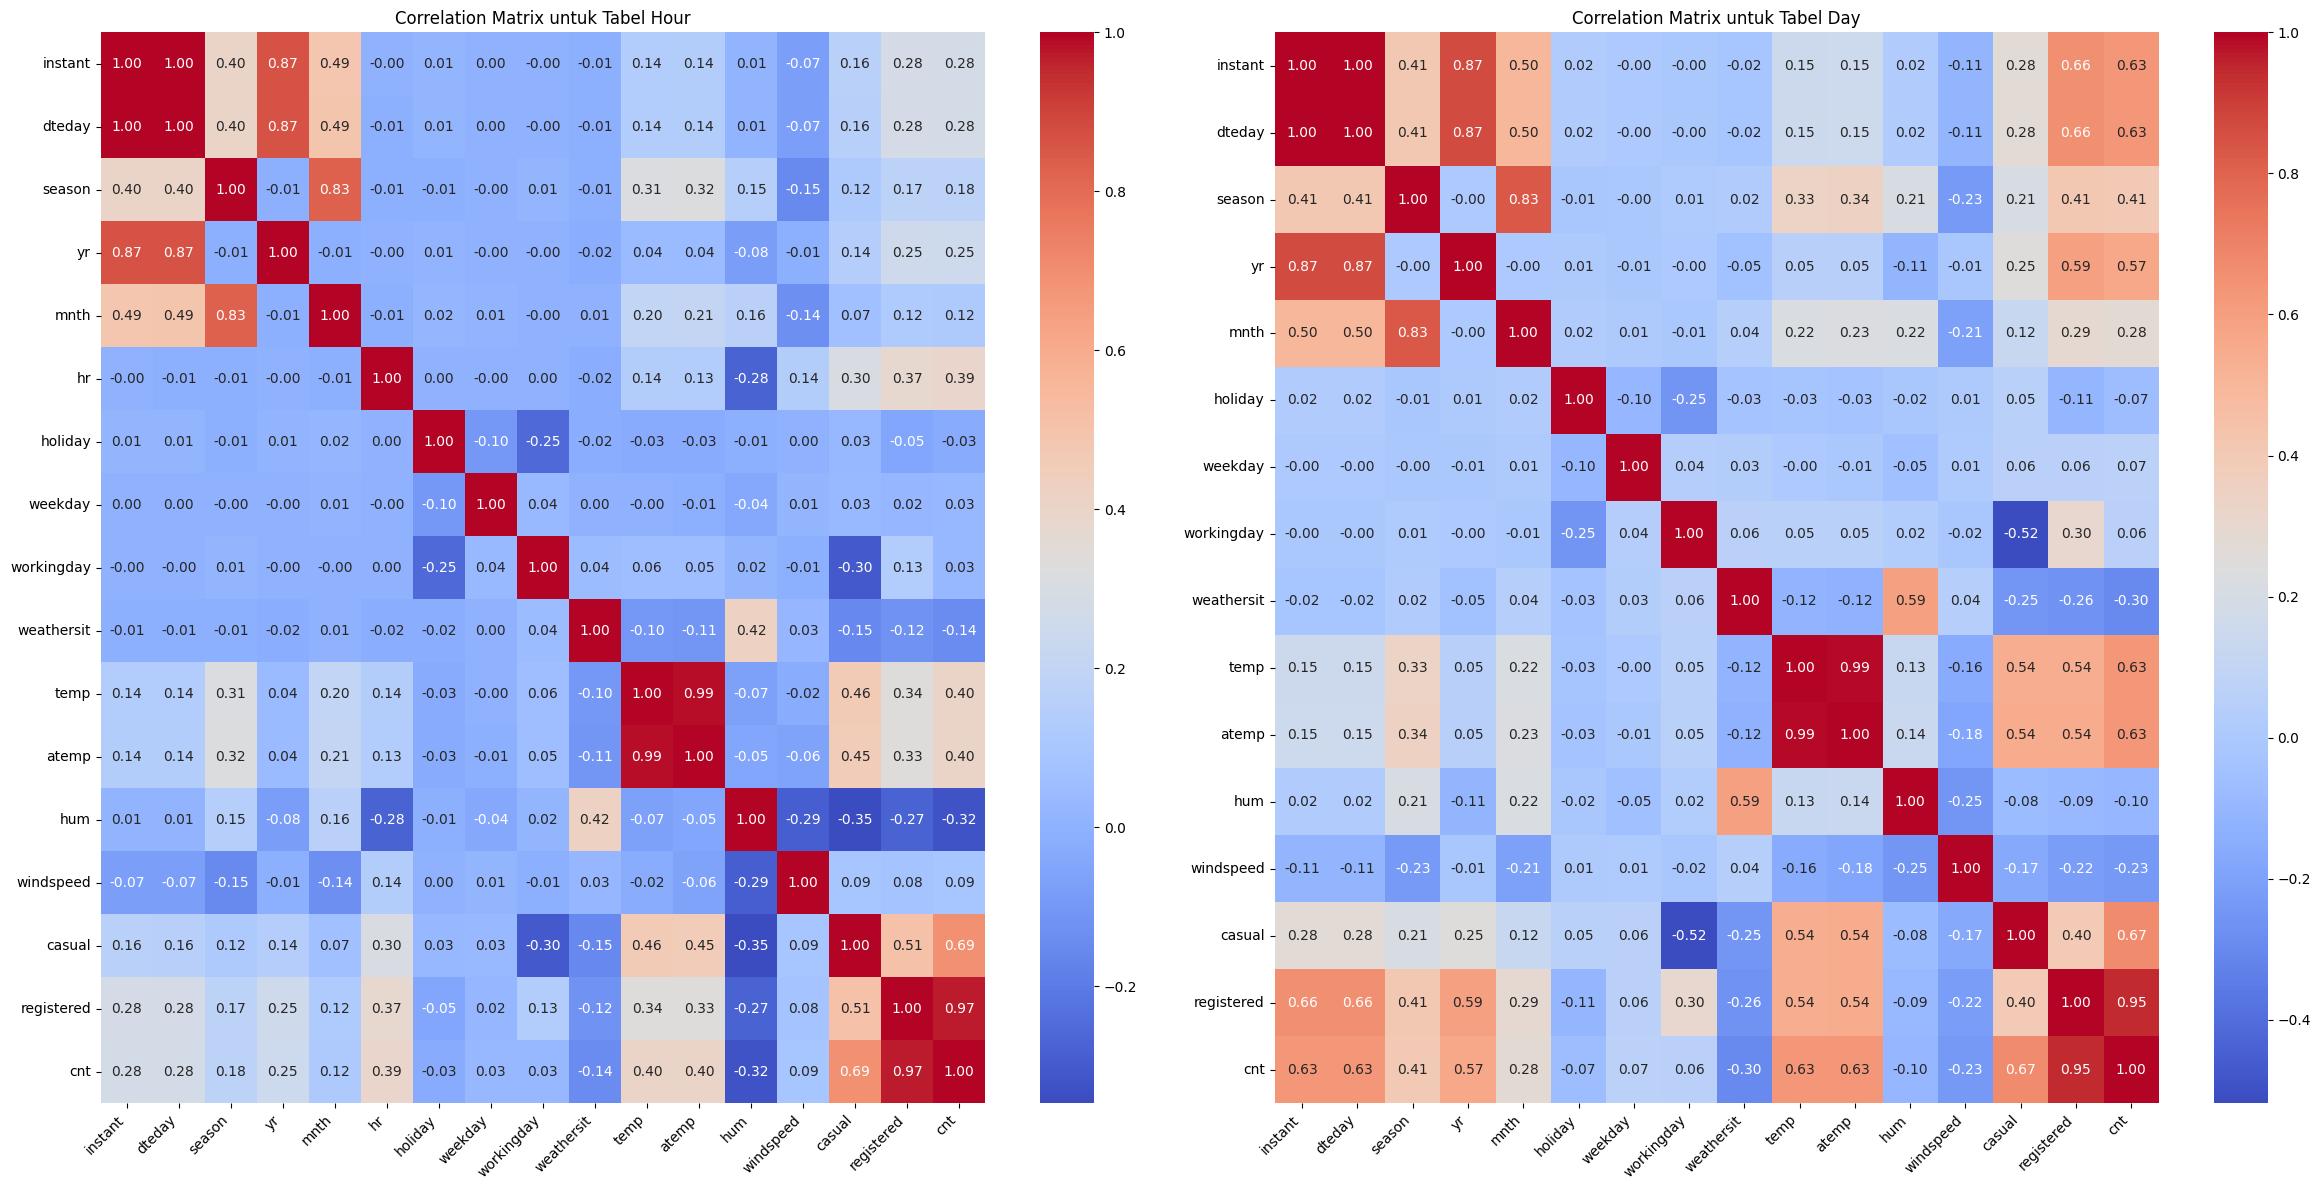

In [154]:
# Kanvas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))

# Heatmap untuk tabel Hour
sns.heatmap(hour_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax1)
ax1.set_title('Correlation Matrix untuk Tabel Hour')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Heatmap untuk tabel Day
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax2)
ax2.set_title('Correlation Matrix untuk Tabel Day')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

- Kolom dteday memiliki hubungan yang bersesuaian sempurna dengan kolom instant untuk masing-masing tabel (1.0)
- Kolom cnt memiliki kesesuaiannya yang hampir sempurna dengan kolom registered untuk masing-masing tabel (0.97 dan 0.95)
- Kolom season dan mnth memiliki kesesuaiannya yang tinggi untuk masing-masing tabel (0.83 dan 0.83)

### Visualization tabel `hour_df`

#### Hist Plot Count Rental Sepeda per Jam

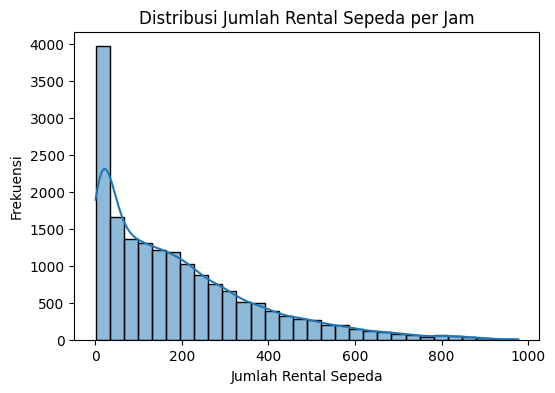

In [155]:
plt.figure(figsize=(6, 4))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Rental Sepeda per Jam')
plt.xlabel('Jumlah Rental Sepeda')
plt.ylabel('Frekuensi')
plt.show()

#### Line Plot Rental Sepeda per Jam Berdasarkan Musim

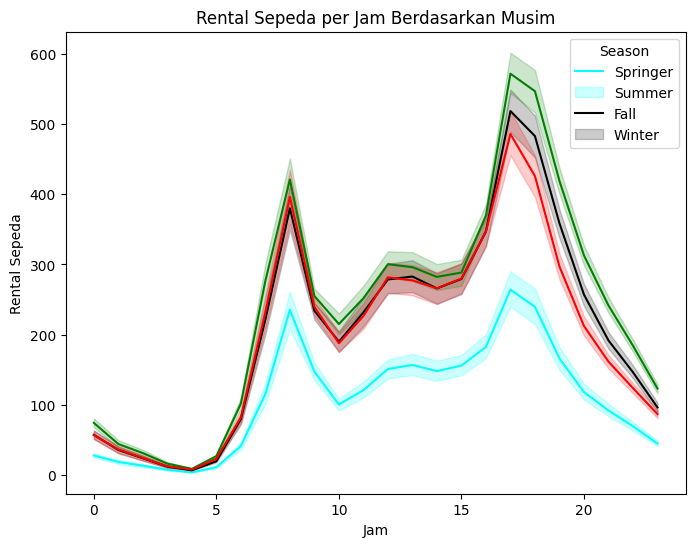

In [156]:
plt.figure(figsize=(8, 6))  
color_palette = ['cyan', 'black', 'green', 'red']
sns.lineplot(x='hr', y='cnt', hue='season', data=hour_df, palette=color_palette)
plt.title('Rental Sepeda per Jam Berdasarkan Musim')
plt.xlabel('Jam')
plt.ylabel('Rental Sepeda')
plt.legend(title='Season', labels=['Springer', 'Summer', 'Fall', 'Winter'])
plt.show()

### Visualization tabel `day_df`

#### Hist Plot Count Rental Sepeda per Hari

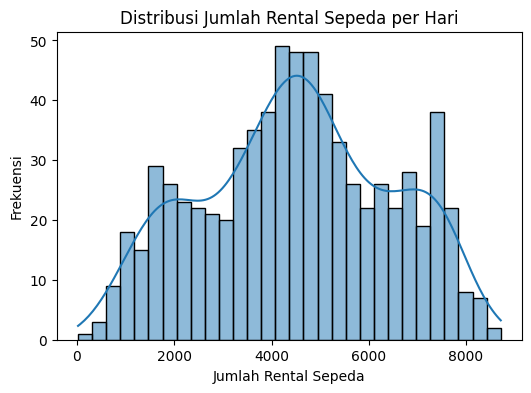

In [157]:
plt.figure(figsize=(6, 4))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Rental Sepeda per Hari')
plt.xlabel('Jumlah Rental Sepeda')
plt.ylabel('Frekuensi')
plt.show()

#### Bar Plot Rental Sepeda berdasarkan Bulan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16560\1052489771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=day_df, palette='rocket')


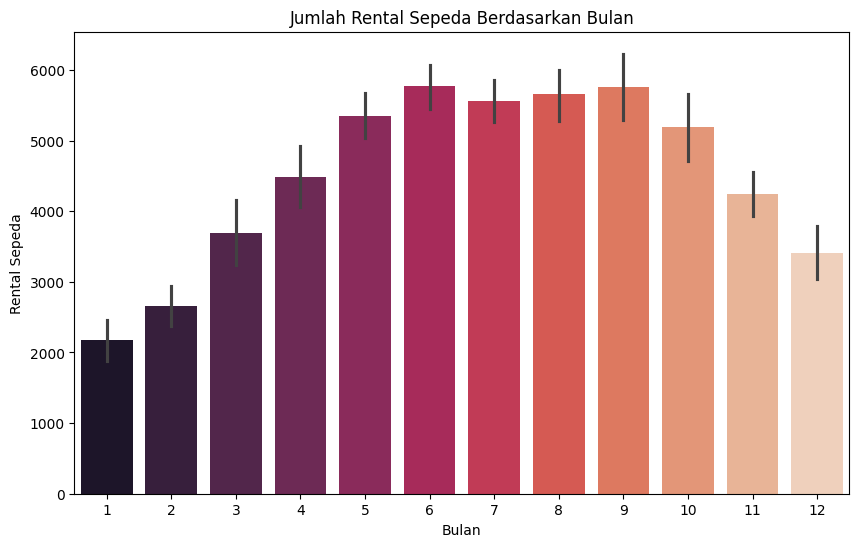

In [158]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=day_df, palette='rocket')
plt.title('Jumlah Rental Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rental Sepeda')
plt.show()

### Pertanyaan 1: - Bagaimana temperature, humidity, dan kondisi cuaca memengaruhi permintaan rental sepeda pada musim yang berbeda?


#### Scatterplot Temperature dan Jumlah Rental Sepeda

Tabel `hour_df`

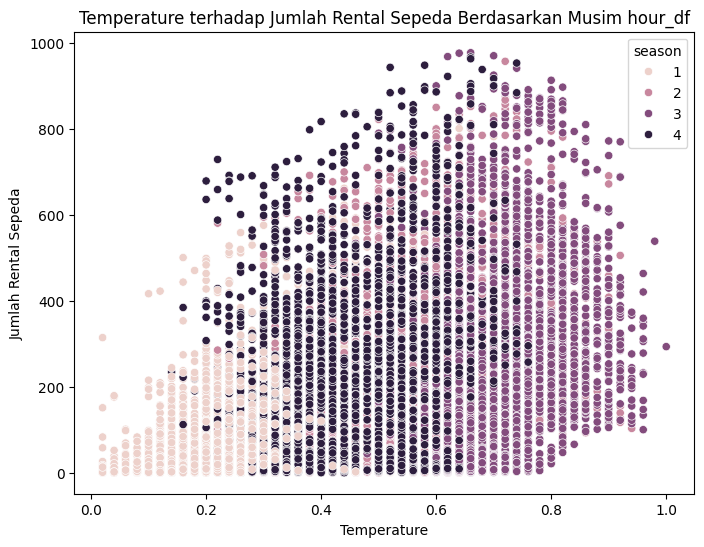

In [159]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', hue='season', data=hour_df)
plt.title('Temperature terhadap Jumlah Rental Sepeda Berdasarkan Musim hour_df')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

- Suhu rendah lebih diminati pada season 1 (Springer) membuat permintaan rental paling sedikit dibanding season yang lain
- Suhu tinggi lebih diminati pada season 3 (Fall)
- Suhu rata-rata/pertengahan lebih diminati pada season 2 dan 4 (Summer dan Winter)
- Rata-rata peminat rental sepeda sama untuk season 2,3, dan 4

Tabel `day_df`

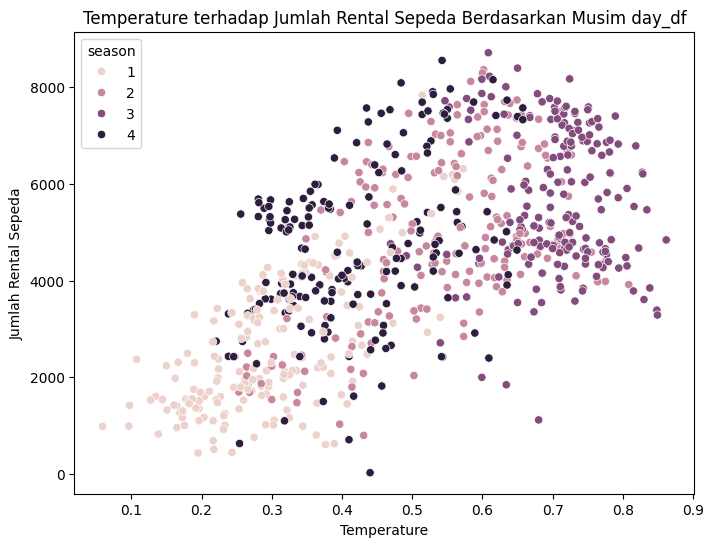

In [160]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', hue='season', data=day_df)
plt.title('Temperature terhadap Jumlah Rental Sepeda Berdasarkan Musim day_df')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

- Suhu rendah lebih diminati pada season 1 (Springer) membuat permintaan rental paling sedikit dibanding season yang lain
- Suhu tinggi lebih diminati pada season 3 (Fall)
- Suhu rata-rata/pertengahan lebih diminati pada season 2 dan 4 (Summer dan Winter)
- Rata-rata peminat rental sepeda sama untuk season 2,3, dan 4

#### Scatterplot Humidity dan Jumlah Rental Sepeda

Tabel `hour_df`

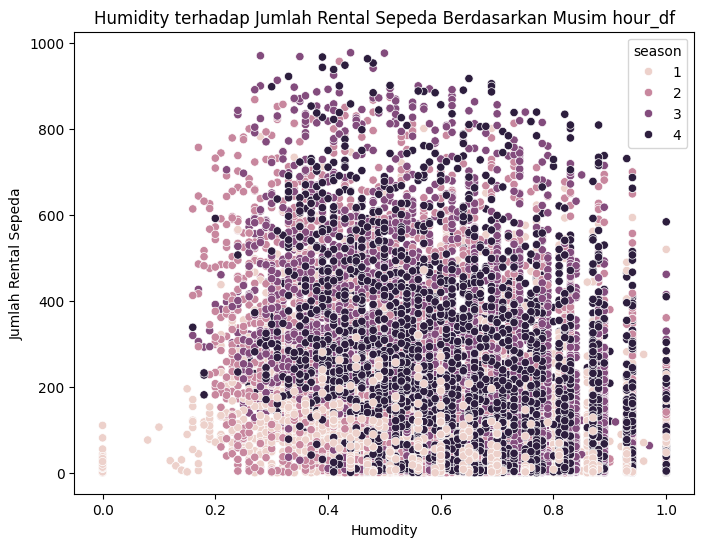

In [161]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hum', y='cnt', hue='season', data=hour_df)
plt.title('Humidity terhadap Jumlah Rental Sepeda Berdasarkan Musim hour_df')
plt.xlabel('Humodity')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

Tingkat humidity pada range 0.2 - 0.8 tidak memiliki pengaruh signifikan terhadap permintaan rental sepeda untuk semua musim

Tabel `day_df`

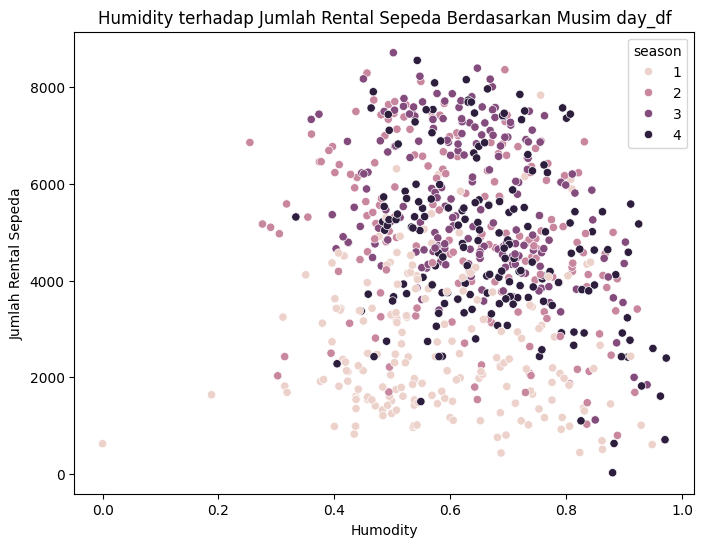

In [162]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hum', y='cnt', hue='season', data=day_df)
plt.title('Humidity terhadap Jumlah Rental Sepeda Berdasarkan Musim day_df')
plt.xlabel('Humodity')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

Tingkat humidity pada range 0.4 - 0.8 tidak memiliki pengaruh signifikan terhadap permintaan rental sepeda untuk semua musim

#### Scatterplot Weathersit dan Jumlah Rental Sepeda

Tabel `hour_df`

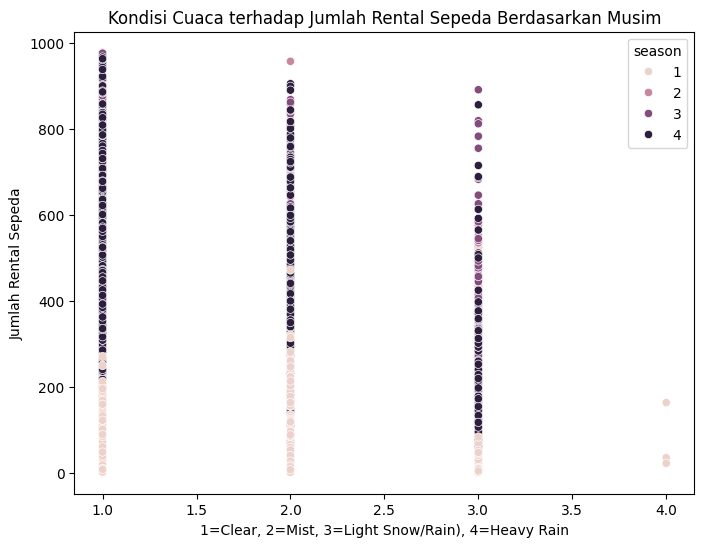

In [163]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weathersit', y='cnt', hue='season', data=hour_df)
plt.title('Kondisi Cuaca terhadap Jumlah Rental Sepeda Berdasarkan Musim')
plt.xlabel('1=Clear, 2=Mist, 3=Light Snow/Rain), 4=Heavy Rain')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

Weathersit=1 (clear) merupakan kondisi cuaca dimana paling banyak diminati untuk rental sepeda, sedangkan weathersit=3 (lightsnow) merupakan kondisi cuaca yang paling sedikit diminati

Tabel `day_df`

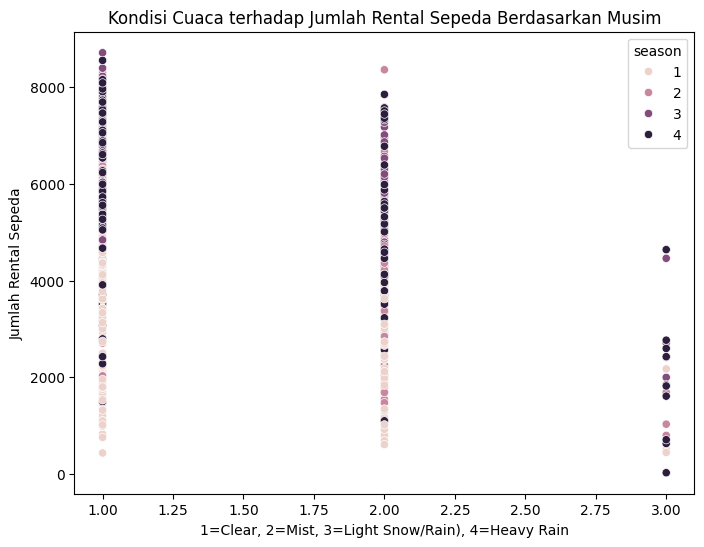

In [164]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weathersit', y='cnt', hue='season', data=day_df)
plt.title('Kondisi Cuaca terhadap Jumlah Rental Sepeda Berdasarkan Musim')
plt.xlabel('1=Clear, 2=Mist, 3=Light Snow/Rain), 4=Heavy Rain')
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

Weathersit=1 (clear) merupakan kondisi cuaca dimana paling banyak diminati untuk rental sepeda, sedangkan weathersit=3 (lightsnow) merupakan kondisi cuaca yang paling sedikit diminati

### Pertanyaan 2: Apa jam sibuk/peak hours dan hari sibuk untuk rental sepeda?

Visualisasinya sudah tertera pada Visualization tabel `hour_df` dan Visualization tabel `day_df` <br>
Untuk memperjelas saya gambarkan ulang dibawah

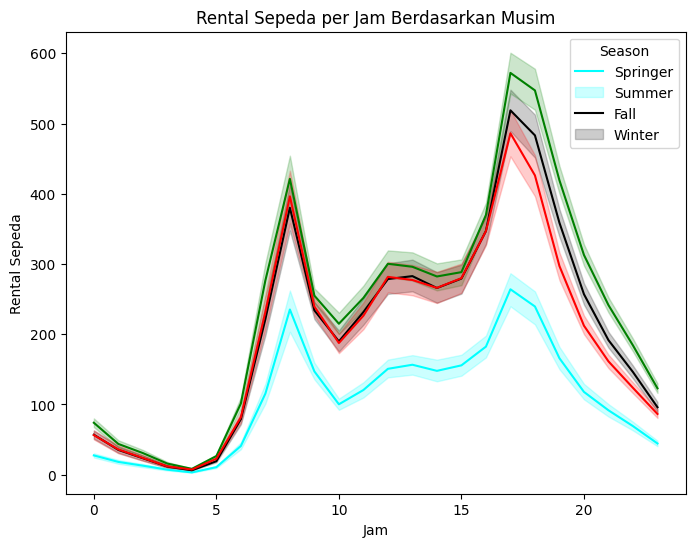

In [165]:
plt.figure(figsize=(8, 6))  
color_palette = ['cyan', 'black', 'green', 'red']
sns.lineplot(x='hr', y='cnt', hue='season', data=hour_df, palette=color_palette)
plt.title('Rental Sepeda per Jam Berdasarkan Musim')
plt.xlabel('Jam')
plt.ylabel('Rental Sepeda')
plt.legend(title='Season', labels=['Springer', 'Summer', 'Fall', 'Winter'])
plt.show()

Peak hour pemesanan rental sepeda terjadi pada jam 15.00 atau jam 3 sore keatas untuk semua musim. Artinya, untuk semua musim paling digemari untuk pemesanan rental sepeda pada jam 3 sore keatas

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16560\1052489771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=day_df, palette='rocket')


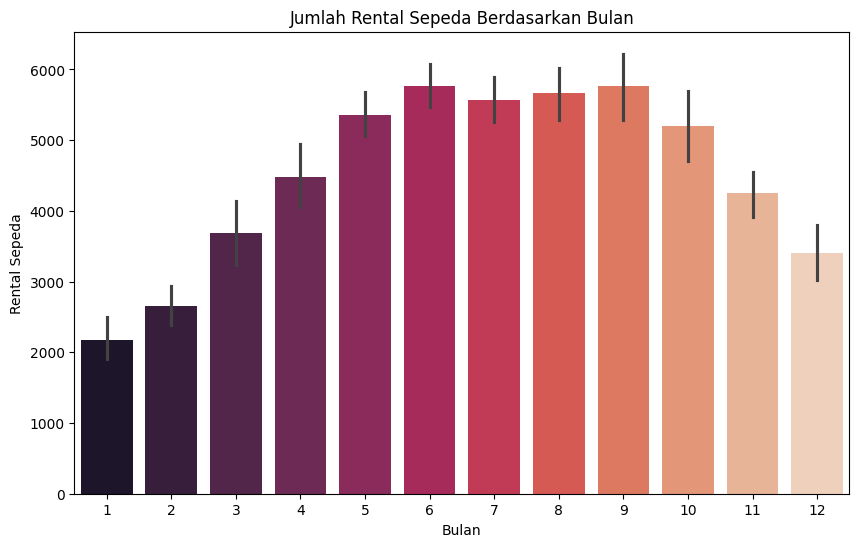

In [166]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=day_df, palette='rocket')
plt.title('Jumlah Rental Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rental Sepeda')
plt.show()

Bulan terbanyak terjadinya rental sepeda yaitu jatuh ke bulan 6 (Juni) dan 9 (September) untuk tabel day_df

Tambahan: Bar Plot Rental sepeda berdasarkan bulan tabel `hour_df`

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16560\3898686762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=hour_df, palette='rocket')


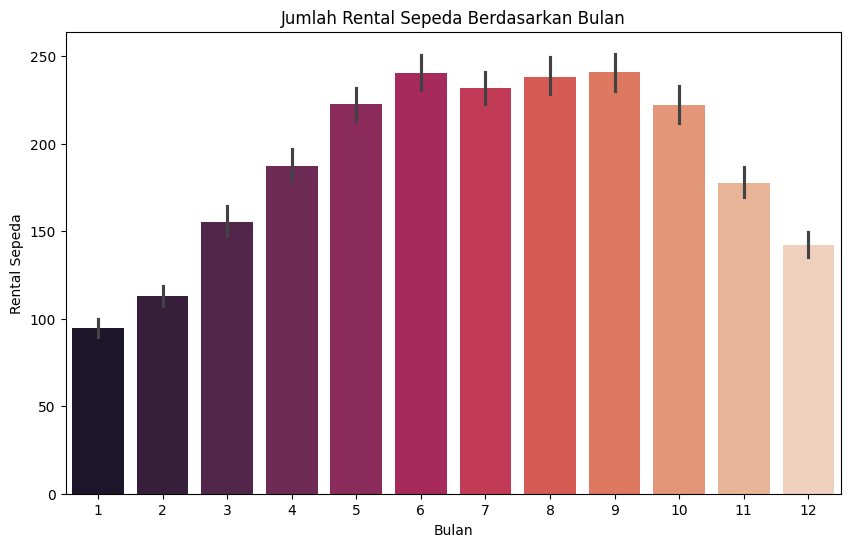

In [167]:
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=hour_df, palette='rocket')
plt.title('Jumlah Rental Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rental Sepeda')
plt.show()

Bulan terbanyak terjadinya rental sepeda yaitu jatuh ke bulan 6 (Juni) dan 9 (September) untuk tabel hour_df

**Insight:**
- Mengetahui jawaban dari pengaruh temperature, humidity, dan cuaca terhadap jumlah pemesanan rental sepeda
- Mengetahui peak hour dan bulan tersibuk dimana orang menggunakan rental sepeda

## Conclusion

- Temperature, humidity, dan kondisi cuaca memiliki pengaruh terhadap permintaan rental sepeda untuk tiap-tiap musim. <br>
Untuk temperature rendah lebih digemari saat musim Springer, untuk temperature tinggi lebih digemari untuk musim Fall. Namun saat temperature rendah peminat rental sepeda paling sedikit dibandingkan temperature sedang dan tinggi. <br>
Untuk humidity range tingkat humidity paling diminati untuk rental sepeda adalah 0.2 - 0.8 untuk semua musim. <br>
Untuk kondisi cuaca, cuaca clear merupakan jumlah terbanyak permintaan rental sepeda dibandingkan cuaca yang lainnya.

- Untuk semua musim, waktu sore diatas pukul 15.00 merupakan waktu favorit bagi perental sepeda, sedangkan waktu sebelum jam 5 pagi merupakan waktu paling sedikit terjadinya permintaan rental sepeda. <br>
Untuk bulan terfavorit bagi perental sepeda ada di bulan Juni dan September dimana permintaan rental merupakan yang paling banyak, sedangkan bulan Januari merupakan bulan paling sedikit peminat rental sepeda.